In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 150

from scipy.stats import ortho_group

In [25]:
# generate the data

d = 20
r = 4

ortho_matrix = ortho_group.rvs(dim=d)

V = ortho_matrix[:, :r]
sigma = np.diag([10, 5, 3, 1])
M = V @ sigma @ V.T

In [26]:
# init
alpha = 5e-7
r_prime = 20
U = alpha * np.random.normal(0, 1, size=(d, r_prime))

T = 500
eta = 0.04

residuals = []
signal1s = []
signal2s = []
signal3s = []
signal4s = []
for t in range(T):
    U -= eta * (U @ U.T - M) @ U
    x = ortho_matrix[:, 0].reshape((d, 1))
    y = ortho_matrix[:, 1].reshape((d, 1))
    z = ortho_matrix[:, 2].reshape((d, 1))
    w = ortho_matrix[:, 3].reshape((d, 1))
    signal1 = x.T @ U @ U.T @ x
    signal2 = y.T @ U @ U.T @ y
    signal3 = z.T @ U @ U.T @ z
    signal4 = w.T @ U @ U.T @ w
    residual = np.linalg.norm(U @ U.T - M, ord='fro')
    residuals.append(residual)
    signal1s.append(signal1[0][0])
    signal2s.append(signal2[0][0])
    signal3s.append(signal3[0][0])
    signal4s.append(signal4[0][0])


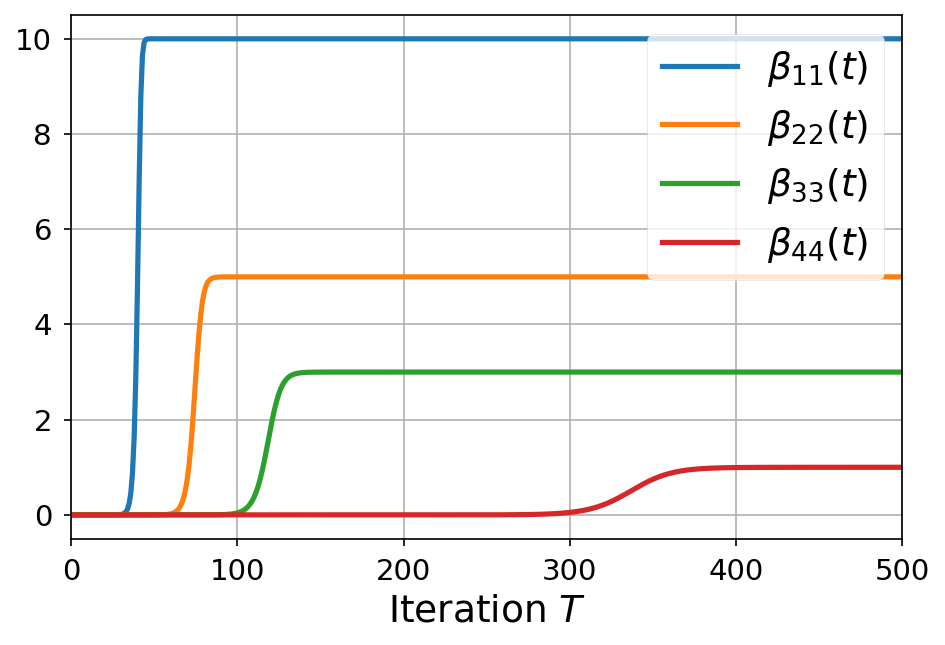

In [39]:
plt.plot(signal1s, linewidth=2.5, label='$\\beta_{11}(t)$')
plt.plot(signal2s, linewidth=2.5, label='$\\beta_{22}(t)$')
plt.plot(signal3s, linewidth=2.5, label='$\\beta_{33}(t)$')
plt.plot(signal4s, linewidth=2.5, label='$\\beta_{44}(t)$')
plt.xlim(0, 500)
plt.xlabel("Iteration $T$", color='k')
plt.legend(loc='upper right', prop={'size': 18})
axes = plt.gca()
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.xticks(color='k', fontsize=14)
plt.yticks(color='k', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('matrix')